# Notebook2: State labeling of All Short MDs

## Import required libraries

In [1]:
# import all libraries and modules
import sys; import os
import pytraj as pt
from sklearn.decomposition import PCA
import numpy as np
import scipy

# for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import art3d

## Import modules from BKit

In [5]:
from BKit.Utils import SplitEvenOdd, PlotSelected
from BKit.ConstructMilestones3D import SortFrames

## Set model parameters

In [6]:
ml_length = 4.0    # distance between milestones
dr = 10.0          # milestone radius (disk radius)
dim = 3            # pc dimention    
yz_pad = 25
dz = 0.1

## Set  path & load previoulsly saved data

In [9]:
DIR_SAVE = '/home/talant/Projects/UCRiver/Milestoning/MileStoningKit/output'
inp = np.load(DIR_SAVE + '/MlPosNorms.npy')
dat = np.load(DIR_SAVE + '/PCA.npy')
pathAll = inp[:,0:3];  normalsAll = inp[:,3:6]

In [10]:
diskID, midID = SplitEvenOdd(N=pathAll.shape[0])
pathMid = pathAll[midID];       pathP = pathAll[diskID]    
normalsMid = normalsAll[midID]; normals = normalsAll[diskID]       

n_cells = normalsMid.shape[0]
n_disks = normals.shape[0]

In [11]:
SortF = SortFrames(dat,dr,dz)
datMid, CellIndx = SortF.SortAllPoints(normals, normalsMid, pathP, pathMid, SortMethod='middle')

In [12]:
nf = dat.shape[0] 
n_sel = datMid.shape[0]
print('total frames',nf)
print('Number of selected points', n_sel)
print('Number of Cells ', n_cells)
print('Number of Disks ', n_disks)

total frames 12020000
Number of selected points 3469105
Number of Cells  91
Number of Disks  92


In [13]:
rand_sel = np.random.randint(0, n_sel, 50000)
datPlot = datMid[rand_sel,:]

## Label all States & Visualize Subset and Save

<IPython.core.display.Javascript object>


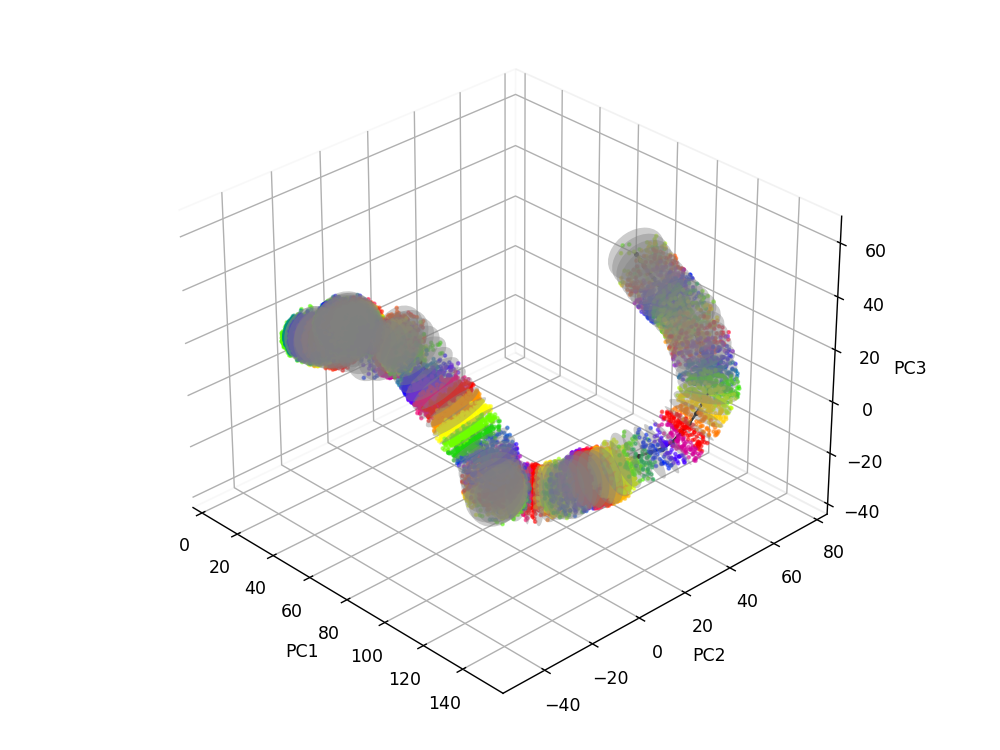

In [14]:
%matplotlib notebook
PlotSelected(datPlot, dr, pathP, normals, yz_pad, figsize=[8,6])


In [9]:
print("writing outputs to " + DIR_SAVE)
np.save(DIR_SAVE + '/CellIndx.npy', CellIndx)

writing outputs to ./output
